# ToolBox # 1: Graphs and Matrices

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from math import *

## I. Matrices de adyacencia y caminos en grafos

### I.1. Definiciones (Revisión de CSE 102)

A lo largo de este cuaderno, un grafo $ G $ de tamaño $ n \geq 1 $ se da por $ (V, E) $ donde:

- $ V = \{ v_1, \dots, v_n \} $ es un conjunto finito de vértices;
- $ E \subset V^2 $ es un conjunto de aristas.


La siguiente es una representación gráfica del grafo con:

- $ V = \{ v_1, v_2, v_3, v_4 \}$
- $ E = (v_1, v_2), (v_2, v_2), (v_2, v_3), (v_3, v_4), (v_4, v_4)$


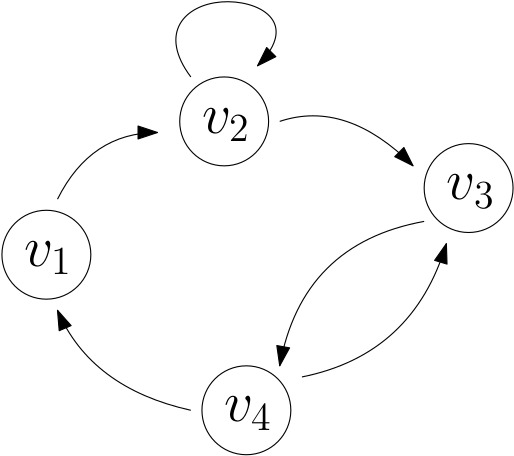

**Definición:** Sea $G = (V, E) $ un grafo de tamaño $ n $ La matriz de adyacencia $ A_G = (a_{i,j})_{1 \leq i,  j \leq n} $ asociada al grafo $ G $ es la matriz $ n \times n $ definida por:


$$a_{i,j} =
\begin{cases}
1 & \text{si la arista } (v_i, v_j) \text{ está en } E, \\
0 & \text{en caso contrario}.
\end{cases}$$

En el ejemplo anterior, la matriz de adyacencia \( A_G \) es:


$$A_G =
\begin{pmatrix}
0 & 1 & 0 & 0 \\
0 & 1 & 1 & 0 \\
0 & 0 & 0 & 1 \\
1 & 0 & 1 & 0 \\
\end{pmatrix}$$

### I.2. Potencias de la matriz de adyacencia

Usaremos continuamente la siguiente propiedad, ya que es la que hace relevante la introducción de las matrices de adyacencia.


**Proposición 1:** Sea $ G = (V, E) $ un grafo de tamaño $ n \geq 1 $ y $ A_G $ su matriz de transición. Para $ 1 \leq i, j \leq n $ y $ k \geq 1 $, denotamos por $ (A^k_G)_{i,j} $ el coeficiente $ (i,j) $ en $ A^k_G $ Entonces,


$$(A^k_G)_{i,j} = \text{Número de caminos de longitud } k \text{ desde } v_i \text{ hasta } v_j \text{ en } G.$$

**Demostración de la Proposición 1:**

Hacemos la demostración en el caso $ k = 2 $, el caso general sigue por inducción. Escribimos $ A_G = (a_{i,j})_{1 \leq i,j \leq n} $. Entonces, por la definición del producto de matrices:



$$
(A^2_G)_{i,j} = a_{i,1} a_{1,j} + a_{i,2} a_{2,j} + \dots + a_{i,n} a_{n,j}.
$$

Consideremos un término $ a_{i,\ell} a_{\ell,j} $ en la suma anterior. Este término es cero a menos que $ a_{i,\ell} = a_{\ell,j} = 1 $. Esto significa que existe un camino de longitud dos $ v_i \to v_\ell \to v_j $. Es decir,


$$
a_{i,\ell} a_{\ell,j} =
\begin{cases}
1 & \text{si existe un camino de longitud 2 desde } v_i \text{ hasta } v_j, \text{ pasando por } v_\ell, \\
0 & \text{en caso contrario}.
\end{cases}
$$

Sumando sobre $ \ell $, obtenemos la proposición en el caso $ k = 2 $.


Fin de la demostración.

### Aplicacion Numerica

In [3]:
# Running example

A=np.matrix([[0, 1, 0, 0],
 [0, 1, 1, 0],
 [0, 0, 0, 1],
 [1, 0, 1, 0]])

print("A_G:")
print(A)

print('-----')
k=20
print("A_G to the power k =",k,':')
A_to_power_k = A**k
print(A_to_power_k)

print('-----')
print('There are ',int(A_to_power_k[0,3]), 'paths of length ',k,' from v_1 to v_4')

A_G:
[[0 1 0 0]
 [0 1 1 0]
 [0 0 0 1]
 [1 0 1 0]]
-----
A_G to the power k = 20 :
[[ 529 1024 1208  792]
 [ 792 1553 1816 1208]
 [ 416  792  945  608]
 [ 608 1208 1400  945]]
-----
There are  792 paths of length  20  from v_1 to v_4


### I.3. (Bonus) Aplicación a la asintótica: un vistazo a la teoría de Perron-Frobenius.


Sea $ v_i, v_j $ dos vértices de un grafo $ G $. Queremos estimar, para grandes $ k $, el número de caminos de longitud $ k $ desde $v_i$ hasta $ v_j $. Gracias a la Proposición 1, esta pregunta se reduce a estimar $(A^k_G)_{i,j}$.


En la siguiente proposición mostramos que la asintótica está determinada por el valor propio más grande de $A_G$.


**Proposición 2 (Versión simplificada del teorema de Perron-Frobenius):**  
Sea $ G = (V, E) $ un grafo de tamaño $ n \geq 1 $ y $ A_G $ su matriz de transición. Supongamos que $ A_G $ es diagonalizable con $ n $ valores propios reales o complejos $ \lambda_1, \lambda_2, \dots, \lambda_n $. Supongamos además que para todo $ 2 \leq \ell \leq n $, se cumple que $ \lambda_1 > |\lambda_\ell| $.


Entonces, para cada $ i, j $, existe una constante $ c_{i,j} \geq 0 $ tal que, cuando $ k \to +\infty $,


$$
\text{Número de caminos de longitud } k \text{ desde } v_i \text{ hasta } v_j \text{ en } G = c_{i,j} \lambda_1^k + o(\lambda_1^k).
$$

(En particular, esto implica que $\lambda_1$ es real.)

### Demostración de la Proposición 2


Necesitamos estimar el coeficiente $ (i,j)$ en $ A^k_G$. Procedemos a diagonalizar $ A_G $:


$$
A_G = P \times
\begin{pmatrix}
\lambda_1 & 0 & 0 & \dots \\
0 & \lambda_2 & 0 & \dots \\
0 & 0 & \lambda_3 & \dots \\
\vdots & \vdots & \vdots & \ddots
\end{pmatrix} \times Q
$$

donde $ Q = P^{-1} $. Escribimos $ P = (p_{i,j}) $ y $ Q = (q_{i,j}) $. (Recordemos que $ (p_{i,\ell})_i $ es un vector propio de $ \lambda_\ell $.)


Para cada $k$:


$$
A^k_G = P \times
\begin{pmatrix}
\lambda_1^k & 0 & 0 & \dots \\
0 & \lambda_2^k & 0 & \dots \\
0 & 0 & \lambda_3^k & \dots \\
\vdots & \vdots & \vdots & \ddots
\end{pmatrix} \times Q
= P \times
\begin{pmatrix}
\lambda_1^k q_{1,j} \\
\lambda_2^k q_{2,j} \\
\lambda_3^k q_{3,j} \\
\vdots
\end{pmatrix}
=
\begin{pmatrix}
\sum_{\ell} p_{i,\ell} q_{\ell,j} \lambda_\ell^k
\end{pmatrix}_{i,j}
$$


Entonces,

$$
(A^k_G)_{i,j} = \sum_{\ell=1}^{n} p_{i,\ell} q_{\ell,j} \lambda_\ell^k = p_{i,1} q_{1,j} \lambda_1^k + \sum_{\ell=2}^{n} p_{i,\ell} q_{\ell,j} \lambda_\ell^k
$$

Esto se puede escribir como:


$$
(A^k_G)_{i,j} = p_{i,1} q_{1,j} \lambda_1^k + o(\lambda_1^k)
$$

dado que $ |\lambda_2|, \dots, |\lambda_n| $ son menores que $\lambda_1$. Así, hemos demostrado la proposición, con $ c_{i,j} = p_{i,1} q_{1,j} $.


**Fin de la Proposición 2.**


Queremos aplicar la Proposición 2 a nuestro ejemplo en curso. Con el siguiente script, calculamos los valores propios de $ A $.

-------
The eigenvalues are:
[-1.17872+0.j       0.33292+0.67077j  0.33292-0.67077j  1.51288+0.j     ]
In particular the largest one is
(1.51288+0j)
-------


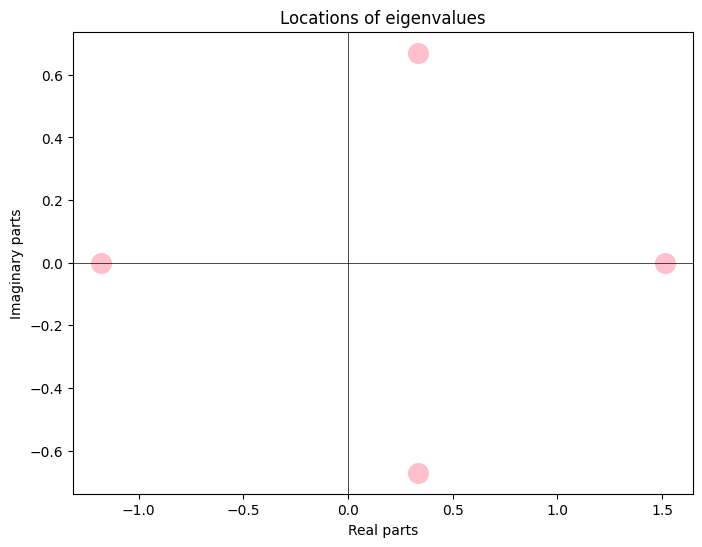

In [4]:
# Running example

Diagonalization=np.linalg.eig(A)

Eigenvalues=Diagonalization[0] # Computes the eigenvalues of A
Eigenvectors=Diagonalization[1] # Computes the passage matrix onto the basis of eigenvectors

print('-------')
print('The eigenvalues are:')
print(np.round(Eigenvalues,5))
print('In particular the largest one is')
lambda_1=max(Eigenvalues)
print(np.round(lambda_1,5))
print('-------')
real_parts = Eigenvalues.real
imag_parts = Eigenvalues.imag

# Plots of eigenvalues
plt.figure(figsize=(8, 6))
plt.scatter(real_parts, imag_parts, color='pink', marker='o', s=200)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
#plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.title('Locations of eigenvalues')
plt.xlabel('Real parts')
plt.ylabel('Imaginary parts')
plt.show()

Ahora graficamos el número de caminos de longitud $k$ desde $ v_1 $ hasta $ v_2 $, y lo comparamos con $ \lambda_1^k $.


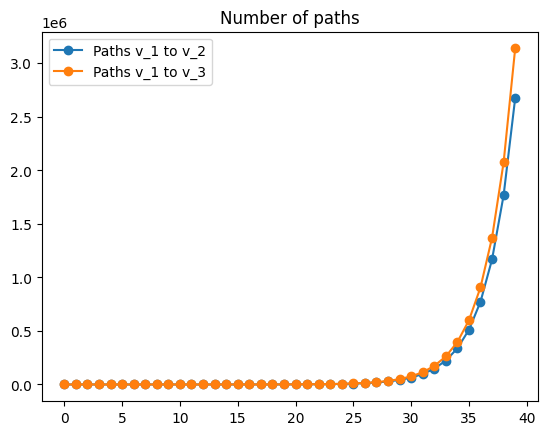

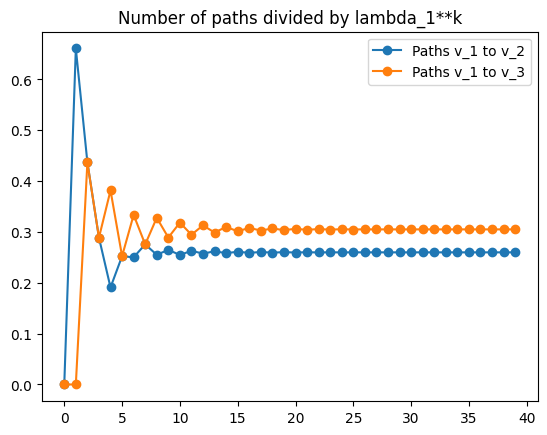

In [9]:
def Paths_from_vi_to_vj(i,j,k):
    A_to_power_k = np.linalg.matrix_power(A,k)
    return A_to_power_k[i-1,j-1]

# We observe that lambda_1 = 1.5128... + 0 \times i where i^2=-1. This is because lambda_1 is obtained
# by numerical approximations. We take the real part in order to avoid this issue.
lambda_1=np.real(lambda_1)

KK=range(40)
NumberOfPaths_v1_v2=[Paths_from_vi_to_vj(1,2,k) for k in KK]
NumberOfPaths_v1_v3=[Paths_from_vi_to_vj(1,3,k) for k in KK]

plt.title('Number of paths')
plt.plot(KK,NumberOfPaths_v1_v2,'o-',label='Paths v_1 to v_2')
plt.plot(KK,NumberOfPaths_v1_v3,'o-',label='Paths v_1 to v_3')
plt.legend()
plt.show()

KK=range(40)
NormalizedNumberOfPaths_v1_v2=[NumberOfPaths_v1_v2[k]/lambda_1**k for k in KK]
NormalizedNumberOfPaths_v1_v3=[NumberOfPaths_v1_v3[k]/lambda_1**k for k in KK]

plt.title('Number of paths divided by lambda_1**k')
plt.plot(KK,NormalizedNumberOfPaths_v1_v2,'o-',label='Paths v_1 to v_2')
plt.plot(KK,NormalizedNumberOfPaths_v1_v3,'o-',label='Paths v_1 to v_3')
plt.legend()
plt.show()

#### Discusión sobre los gráficos anteriores

Los gráficos son consistentes con la Proposición 2: por ejemplo, el número de caminos $ v_1 \to v_2 $ parece ser equivalente a $ c_{1,2} \lambda_1^k $, donde (empíricamente) $ c_{1,2} \approx 0.2600 $, mientras que el número de caminos $ v_1 \to v_3 $ parece ser equivalente a $ c_{1,3} \lambda_1^k $, con $ c_{1,3} \approx 0.3051 $.

## II. Matrices de transición y grafos probabilísticos


### II.1. Definiciones


**Definición:** Sea $ G $ un grafo con conjunto de vértices $ V = \{ v_1, \dots, v_n \} $. Una matriz de transición $ P $ sobre $ V $ es una matriz $ n \times n $ $ P = (p_{i,j})_{1 \leq i,j \leq n} $ tal que:


- Cada coeficiente $ p_{i,j} $ está en el intervalo $ [0,1] $.
- Para todo $ 1 \leq i \leq n $, se cumple que:


$$
\sum_{j=1}^{n} p_{i,j} = 1.
$$

Aquí hay un ejemplo de una matriz de transición sobre un conjunto $ \{ v_1, \dots, v_4 \} $:


$$
P =
\begin{pmatrix}
\frac{1}{4} & \frac{1}{4} & \frac{1}{2} & 0 \\
\frac{1}{2} & 0 & \frac{1}{4} & \frac{1}{4} \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1
\end{pmatrix}
$$


Es conveniente representar una matriz de transición como un grafo probabilístico: ponemos una arista $ v_i \to v_j $ con peso $ p_{i,j} $. La matriz $ P $ anterior corresponde al siguiente grafo probabilístico:

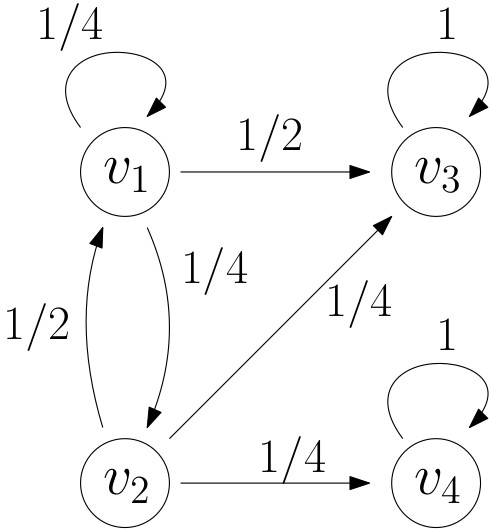



Una matriz de transición se utiliza para modelar el proceso aleatorio de un individuo (que puede ser una partícula en un sistema físico, un agente en un modelo económico, una variable interna en un algoritmo estocástico, ...) sobre el conjunto $ V $. El coeficiente $ p_{i,j}$ se interpreta como la probabilidad de ir de $ v_i $ a $ v_j $ en exactamente un paso de tiempo.



El marco adecuado para tal modelo es el de las cadenas de Markov.


**Definición:** Sea $ P $ una matriz de transición sobre algún conjunto de vértices $ V $ y sea $ v_{i_0} \in V $ un vértice particular llamado punto de inicio. Una cadena de Markov $ (X_t)_{t \in \mathbb{N}} $ con matriz de transición $ P $ y punto de inicio $ v_{i_0} $ es una secuencia de variables aleatorias tal que:


- $ X_0 = v_{i_0}$.
- Para todo $ t \geq 1 $, para cualquier $ t $-tupla de vértices $ v_{i_1}, \dots, v_{i_t} $, se cumple que:


$$
P(X_1 = v_{i_1}, \dots, X_t = v_{i_t}) = p_{i_0, i_1} \times p_{i_1, i_2} \times \dots \times p_{i_{t-1}, i_t}.
$$

### II.2. Potencias de una matriz de transición

Las potencias sucesivas de una matriz de transición $P$ permiten calcular la distribución de una cadena de Markov en un tiempo dado.


#### Proposición 3

Sea $(X_t)_{t \in \mathbb{N}}$ una cadena de Markov con matriz de transición $P$ sobre algún conjunto de vértices $\{ v_1, \dots, v_n \}$. Denotemos por $v_{i_0}$ su punto de inicio. Entonces, para todo $t \geq 1$ y para cualquier vértice $v_j$,


$$
P(X_t = v_j) = (P^t)_{i_0, j}.
$$

#### Demostración de la Proposición 3

Por la ley de probabilidades totales:


$$
P(X_t = v_j) = \sum_{i_1, \dots, i_{t-1} \in V} P(X_1 = v_{i_1}, \dots, X_{t-1} = v_{i_{t-1}}, X_t = v_j)
$$

Esto se puede reescribir como:


$$
P(X_t = v_j) = \sum_{i_1, \dots, i_{t-1} \in V} p_{i_0, i_1} \times p_{i_1, i_2} \times \dots \times p_{i_{t-2}, i_{t-1}} \times p_{i_{t-1}, j} = (P^t)_{i_0, j}.
$$

(Si la última igualdad no es clara, puedes intentar demostrarla por inducción sobre $t$.)


**Fin de la Proposición 3.**


#### Aplicación a nuestro ejemplo:

In [6]:
P=np.matrix([
[1/4, 1/4, 1/2, 0],
[1/2, 0  , 1/4, 1/4],
[0,0,1,0],
[0,0,0,1],
])
print('-----')
print("P =")
print(P)

print('-----')
t=6
print("P to the power ",t)
P_to_power_t = np.linalg.matrix_power(P,t) # computes P**t
print(np.round(P_to_power_t,4))
print('-----')
print('Asumme X_0=v_1. At time t =',t,' X_t is at position v_2 with probability ',np.round(P_to_power_t[0,1],4))


-----
P =
[[0.25 0.25 0.5  0.  ]
 [0.5  0.   0.25 0.25]
 [0.   0.   1.   0.  ]
 [0.   0.   0.   1.  ]]
-----
P to the power  6
[[0.0105 0.0051 0.887  0.0974]
 [0.0103 0.0054 0.687  0.2974]
 [0.     0.     1.     0.    ]
 [0.     0.     0.     1.    ]]
-----
Asumme X_0=v_1. At time t = 6  X_t is at position v_2 with probability  0.0051


### II.3. Estados absorbentes: experimentos y teoría

Al observar el grafo probabilístico de nuestro ejemplo anterior, vemos que si la partícula llega a $v_3$, se queda en $v_3$ para siempre (lo mismo ocurre en $v_4$). Decimos que $v_3$ y $v_4$ son **estados absorbentes** para la cadena $(X_t)$.


La siguiente pregunta es natural: ¿cuál es la probabilidad de que, comenzando desde $v_1$, la cadena sea absorbida en $v_3$? ¿En $v_4$?


Si calculamos $P^t$ para un valor grande de $t$ en nuestro ejemplo, obtenemos:

In [7]:
print('-----')
t=30
print("P to the power ",t)
P_to_power_t = np.linalg.matrix_power(P,t) # computes A**t
print(np.round(P_to_power_t,4))
print('-----')
for starting_point in [0,1]:
    for absorbing_state in [2,3]:
        print('Asumme X_0=v_'+str(starting_point+1)+'. At time t ='+str(t)+' X_t is at position v_'+str(absorbing_state+1)+' with probability '+str(np.round(P_to_power_t[starting_point,absorbing_state],10)))

-----
P to the power  30
[[0.  0.  0.9 0.1]
 [0.  0.  0.7 0.3]
 [0.  0.  1.  0. ]
 [0.  0.  0.  1. ]]
-----
Asumme X_0=v_1. At time t =30 X_t is at position v_3 with probability 0.8999999992
Asumme X_0=v_1. At time t =30 X_t is at position v_4 with probability 0.0999999998
Asumme X_0=v_2. At time t =30 X_t is at position v_3 with probability 0.6999999992
Asumme X_0=v_2. At time t =30 X_t is at position v_4 with probability 0.2999999998


Esto sugiere que si el punto de inicio es $v_1$, entonces


$$
P(\text{la cadena es absorbida en } v_3) \approx 0.9, \quad P(\text{la cadena es absorbida en } v_4) \approx 0.1.
$$

En esta sección no establecemos un resultado general, sino que explicamos en este ejemplo cómo calcular exactamente las probabilidades de absorción.


Para un estado arbitrario $v_i$ y un estado absorbente $a$, sea $\alpha^a_{v_i}$ la probabilidad de que, comenzando en $v_i$, la cadena sea absorbida en $a$. Por supuesto,


$$
\alpha_{v_3}^{v_3} = \alpha_{v_4}^{v_4} = 1, \quad \alpha_{v_4}^{v_3} = \alpha_{v_3}^{v_4} = 0.
$$

Escribimos:


$$
\alpha_{v_3}^{v_1} = P(X_0 = v_1, \text{ la cadena es absorbida en } v_3) = P(X_0 = v_1, X_1 = v_1, \text{ la cadena es absorbida en } v_3)
$$

$$
+ P(X_0 = v_1, X_1 = v_2, \text{ la cadena es absorbida en } v_3) + P(X_0 = v_1, X_1 = v_3, \text{ la cadena es absorbida en } v_3)
$$

$$
= p_{1,1} \alpha_{v_3}^{v_1} + p_{1,2} \alpha_{v_3}^{v_2} + p_{1,3} \alpha_{v_3}^{v_3}
$$

$$
= \frac{1}{4} \alpha_{v_3}^{v_1} + \frac{1}{4} \alpha_{v_3}^{v_2} + \frac{1}{2}.
$$

Si hacemos lo mismo comenzando desde $v_2$, obtenemos

$$
\alpha_{v_3}^{v_2} = \frac{1}{2} \alpha_{v_3}^{v_1} + \frac{1}{4} + \frac{1}{4} \times 0.
$$

Finalmente, tenemos el sistema lineal $2 \times 2$:


$$
\left\{
\begin{array}{l}
\alpha_{v_3}^{v_1} = \frac{1}{4} \alpha_{v_3}^{v_1} + \frac{1}{4} \alpha_{v_3}^{v_2} + \frac{1}{2} \\
\alpha_{v_3}^{v_2} = \frac{1}{2} \alpha_{v_3}^{v_1} + \frac{1}{4}
\end{array}
\right.
$$

De aquí obtenemos que:

$$
\left\{
\begin{array}{l}
\alpha_{v_3}^{v_1} = \frac{9}{10} \\
\alpha_{v_3}^{v_2} = \frac{7}{10}
\end{array}
\right.
$$

Lo que es consistente con nuestra aproximación numérica.

### II.4. Bonus: La propiedad de Markov


La siguiente propiedad es fundamental para las cadenas de Markov. Nos dice que para calcular la distribución de $X_{t+1}$, es suficiente con conocer la distribución de $X_t$.


#### Proposición 3 (Propiedad de Markov).

Sea $(X_t)_{t \in \mathbb{N}}$ una cadena de Markov con matriz de transición $P$. Para todo $t \geq 1$, y para todo $t+1$-tuplo de vértices $v_{i_1}, \dots, v_{i_{t+1}}$,


$$
P(X_{t+1} = v_{i_{t+1}} | X_1 = v_{i_1}, \dots, X_t = v_{i_t}) = P(X_{t+1} = v_{i_{t+1}} | X_t = v_{i_t}) = p_{i_t, i_{t+1}}.
$$

#### Prueba de la Proposición 3.


Primero, calculemos el lado izquierdo de la ecuación, usando la definición de probabilidades condicionales:


$$
P(X_{t+1} = v_{i_{t+1}} | X_1 = v_{i_1}, \dots, X_t = v_{i_t}) = \frac{P(X_1 = v_{i_1}, \dots, X_t = v_{i_t}, X_{t+1} = v_{i_{t+1}})}{P(X_1 = v_{i_1}, \dots, X_t = v_{i_t})}
$$


$$
= \frac{p_{i_0, i_1} \times p_{i_1, i_2} \times \dots \times p_{i_{t-1}, i_t} \times p_{i_t, i_{t+1}}}{p_{i_0, i_1} \times p_{i_1, i_2} \times \dots \times p_{i_{t-1}, i_t}} = p_{i_t, i_{t+1}}.
$$

Ahora calculemos el lado derecho de la ecuación, usando la ley de probabilidades totales:


$$
P(X_{t+1} = v_{i_{t+1}} | X_t = v_{i_t}) = \frac{P(X_t = v_{i_t}, X_{t+1} = v_{i_{t+1}})}{P(X_t = v_{i_t})}.
$$

$$
= \sum_{i_0, \dots, i_{t-1} \in V} P(X_1 = v_{i_1}, \dots, X_t = v_{i_t}, X_{t+1} = v_{i_{t+1}}) = \sum_{i_0, \dots, i_{t-1} \in V} p_{i_0, i_1} \times p_{i_1, i_2} \times \dots \times p_{i_{t-1}, i_t} \times p_{i_t, i_{t+1}}.
$$

$$
= \sum_{i_0, \dots, i_{t-1} \in V} p_{i_0, i_1} \times p_{i_1, i_2} \times \dots \times p_{i_{t-1}, i_t} = p_{i_t, i_{t+1}}.
$$

Fin de la prueba de la Proposición 3.